In [25]:
from scipy import misc
import numpy as np

In [2]:
bmp = misc.imread('/Users/birdbrain/Documents/Research/Projects/Schatz/Data/g21chaotic/r4000_2016_02_04_superfast/g21flow/BMPs_sublevel/00274.bmp')

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline  

heatmap = plt.pcolor(bmp)

In [3]:
grad = np.gradient(bmp.astype(float))

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline  

plt.rcParams['figure.figsize'] = (20.0, 10.0)

plt.subplot(1,2,1)
heatmap = plt.pcolor(grad[0])
plt.colorbar()

plt.subplot(1,2,2)
heatmap = plt.pcolor(grad[1])
plt.colorbar()


## Continuous Version

In [32]:
blockRadius=5

### Compute orientation field

In [33]:
import math

O = np.zeros(bmp.shape)

for x in range(0,bmp.shape[0]):
    for y in range(0,bmp.shape[1]):
        numerator = 0.
        denominator = 0.
        for i in range(max(0,x-blockRadius),min(bmp.shape[0],x+blockRadius)):
            for j in range(max(0,y-blockRadius),min(bmp.shape[0],y+blockRadius)):
                numerator = numerator + 2.*grad[0][i,j]*grad[1][i,j]
                denominator = denominator + (math.pow(grad[0][i,j],2.) - math.pow(grad[1][i,j],2.))
        if denominator==0:
            O[x,y] = 0
        elif denominator > 0:
            O[x,y] = (1./2.)*math.atan(numerator/denominator)
        elif numerator >= 0:
            O[x,y] = (1./2.)*(math.atan(numerator/denominator)+math.pi)
        elif numerator < 0:
            O[x,y] = (1./2.)*(math.atan(numerator/denominator)-math.pi)
            

for x in range(0,bmp.shape[0]):
    for y in range(0,bmp.shape[1]):
        if O[x,y] <= 0:
            O[x,y] = O[x,y] + math.pi
        else:
            O[x,y] = O[x,y]



### Compute Poincare indices of each point

In [43]:
# Do the poincare index computations
numSteps = 75
P = np.zeros(bmp.shape)

r = 5.

for x in range(int(r), bmp.shape[0] - int(r)):
    for y in range(int(r), bmp.shape[1] - int(r)):
        for i in range(0,numSteps):
            t1 = i*((2.*math.pi)/float(numSteps))
            x1=x+int(r*math.cos(t1))
            y1=y+int(r*math.sin(t1))
            t2 = (i+1)*((2.*math.pi)/float(numSteps))
            x2=x+int(r*math.cos(t2))
            y2=y+int(r*math.sin(t2))
            d = O[x2,y2] - O[x1,y1]
            if abs(d) <= math.pi/2.:
                P[x,y] = P[x,y] + d
            if d > math.pi/2.:
                P[x,y] = P[x,y] + math.pi - d
            if d < -math.pi/2.:
                P[x,y] = P[x,y] + math.pi + d
        
P = P/math.pi

<matplotlib.colorbar.Colorbar instance at 0x3dcdd3368>

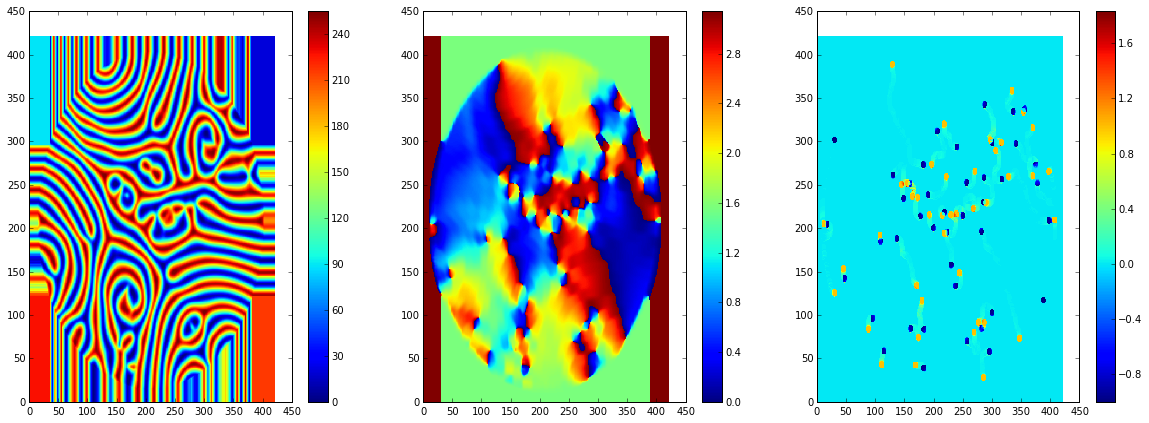

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 7.0)

plt.figure()

plt.subplot(1,3,1)
img = plt.pcolor(bmp)
plt.colorbar()

plt.subplot(1,3,2)
img = plt.pcolor(O)
plt.colorbar()

plt.subplot(1,3,3)
heatmap = plt.pcolor(P)
plt.colorbar()


<matplotlib.colorbar.Colorbar instance at 0x3cd083320>

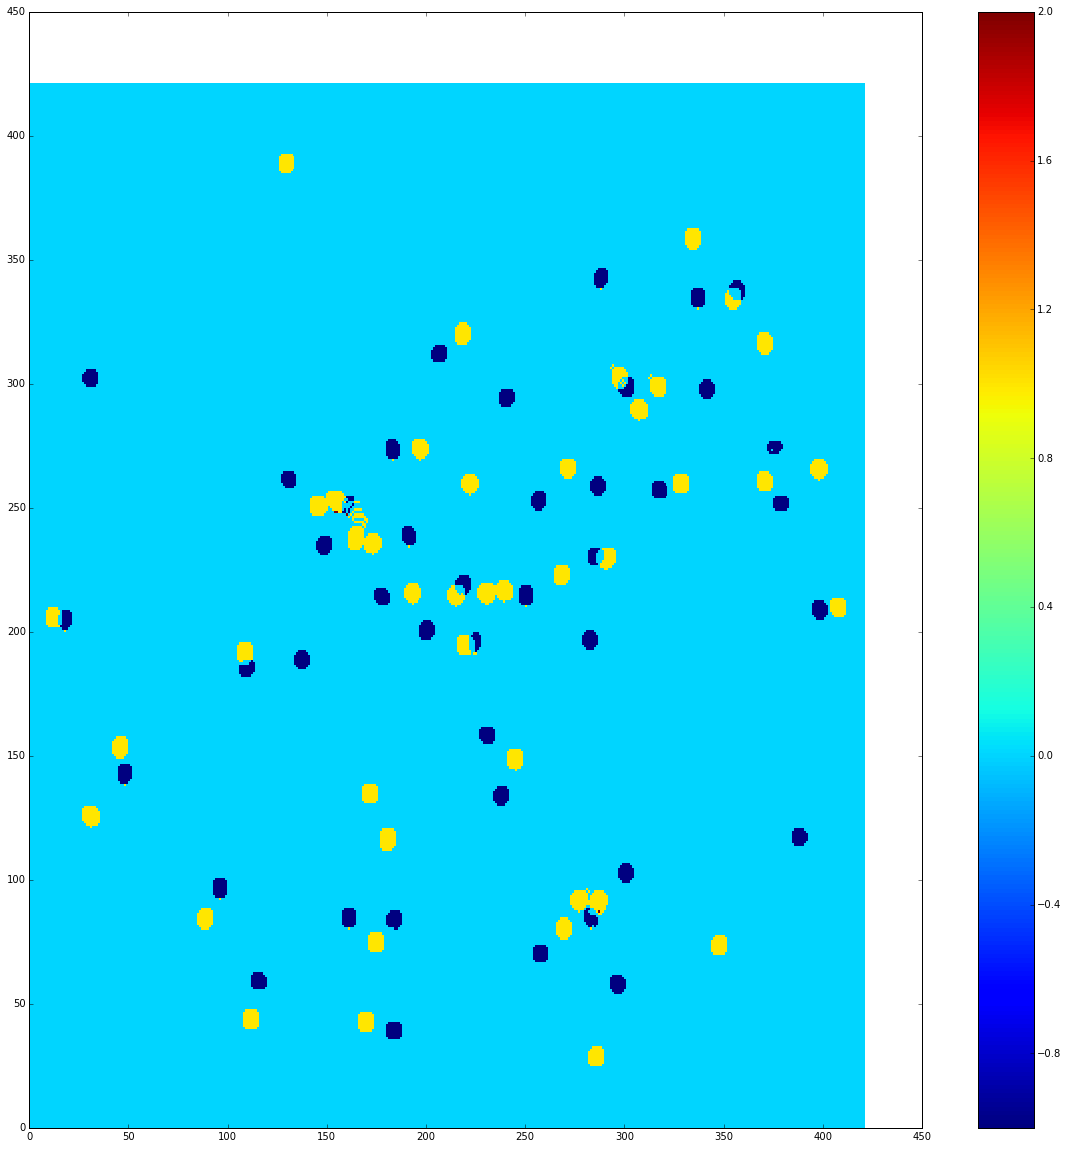

In [45]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.figure()
heatmap = plt.pcolor(np.rint(P))
plt.colorbar()

## Discrete Version

In [ ]:
blockRadius=3

In [ ]:
import math

width=math.floor(bmp.shape[0]/float(blockRadius))

O = np.zeros((int(width), int(width)))

for x in range(0,int(width)):
    for y in range(0,int(width)):
        numerator = 0.
        denominator = 0.
        for i in range(x*blockRadius, x*blockRadius+blockRadius):
            for j in range(y*blockRadius, y*blockRadius+blockRadius):
                numerator = numerator + 2.*grad[0][i,j]*grad[1][i,j]
                denominator = denominator + (math.pow(grad[0][i,j],2.) - math.pow(grad[1][i,j],2.))
        if denominator==0:
            O[x,y] = 0
        elif denominator > 0:
            O[x,y] = (1./2.)*math.atan(numerator/denominator)
        elif numerator >= 0:
            O[x,y] = (1./2.)*(math.atan(numerator/denominator)+math.pi)
        elif numerator < 0:
            O[x,y] = (1./2.)*(math.atan(numerator/denominator)-math.pi)
            

for x in range(0,int(width)):
    for y in range(0,int(width)):
        if O[x,y] <= 0:
            O[x,y] = O[x,y] + math.pi/2.
        else:
            O[x,y] = O[x,y] - math.pi/2.


In [ ]:
# Do the poincare index computations
numSteps = 50
P = np.zeros(O.shape)

r = 2.

for x in range(int(r), O.shape[0] - int(r)):
    for y in range(int(r), O.shape[1] - int(r)):
        for i in range(0,numSteps):
            t1 = i*((2.*math.pi)/float(numSteps))
            x1=x+int(r*math.cos(t1))
            y1=y+int(r*math.sin(t1))
            t2 = (i+1)*((2.*math.pi)/float(numSteps))
            x2=x+int(r*math.cos(t2))
            y2=y+int(r*math.sin(t2))
            d = O[x2,y2] - O[x1,y1]
            if abs(d) <= math.pi/2.:
                P[x,y] = P[x,y] + d
            if d > math.pi/2.:
                P[x,y] = P[x,y] + math.pi - d
            if d < -math.pi/2.:
                P[x,y] = P[x,y] + math.pi + d
        
P = P/math.pi

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 7.0)

plt.figure()

plt.subplot(1,3,1)
img = plt.pcolor(bmp)
plt.colorbar()

plt.subplot(1,3,2)
img = plt.pcolor(O)
plt.colorbar()

plt.subplot(1,3,3)
heatmap = plt.pcolor(P)
plt.colorbar()
